This notebook is essentially identical to the torch tutorial here: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

I only changed the activation function to be a better one, and I am trying to learn its parameter.

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

import numpy as np

In [8]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


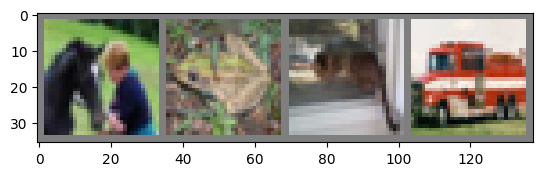

horse frog  cat   truck


In [9]:
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [10]:
""" def Better_Activation(x, killing_threshold):
    # Set elements with absolute values smaller than killing_threshold to 0
    mask = torch.abs(x) >= killing_threshold
    x = x * mask.type(x.dtype)
    return x """

' def Better_Activation(x, killing_threshold):\n    # Set elements with absolute values smaller than killing_threshold to 0\n    mask = torch.abs(x) >= killing_threshold\n    x = x * mask.type(x.dtype)\n    return x '

In [11]:
# The idea of this activation function is to kill neurons with absolute values smaller than killing_threshold.

def Better_Activation(x, killing_threshold):
    # Kill neurons with absolute values smaller than killing_threshold
    x[torch.abs(x) < killing_threshold] = 0
    return x

In [24]:
# define a simple CNN with 2 convolutional layers and 3 fully connected layers

class Net(nn.Module):
    def __init__(self, killing_threshold):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.killing_threshold = nn.Parameter(torch.tensor(killing_threshold))


    def Better_Activation(self, x, killing_threshold):
        # Kill neurons with absolute values smaller than killing_threshold
        x[torch.abs(x) < killing_threshold] = 0
        return x
        
    def forward(self, x):
        x = self.pool(self.Better_Activation(self.conv1(x), self.killing_threshold))
        x = self.pool(self.Better_Activation(self.conv2(x), self.killing_threshold))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.Better_Activation(self.fc1(x), self.killing_threshold)
        x = self.Better_Activation(self.fc2(x), self.killing_threshold)
        x = self.fc3(x)
        return x


In [25]:
""" class BNNet(nn.Module):
    def __init__(self, killing_threshold):
        super().__init__()
        self.conv1 = nn.Sequential(nn.Conv2d(3, 6, 5), nn.BatchNorm2d(6))
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Sequential(nn.Conv2d(6, 16, 5), nn.BatchNorm2d(16))
        self.fc1 = nn.Sequential(nn.Linear(16 * 5 * 5, 120), nn.BatchNorm1d(120))
        self.fc2 = nn.Sequential(nn.Linear(120, 84), nn.BatchNorm1d(84))
        self.fc3 = nn.Linear(84, 10)
        self.killing_threshold = nn.Parameter(torch.tensor(killing_threshold))

    def forward(self, x):
        x = self.pool(Better_Activation(self.conv1(x), self.killing_threshold))
        x = self.pool(Better_Activation(self.conv2(x), self.killing_threshold))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = Better_Activation(self.fc1(x), self.killing_threshold)
        x = Better_Activation(self.fc2(x), self.killing_threshold)
        x = self.fc3(x)
        return x """

' class BNNet(nn.Module):\n    def __init__(self, killing_threshold):\n        super().__init__()\n        self.conv1 = nn.Sequential(nn.Conv2d(3, 6, 5), nn.BatchNorm2d(6))\n        self.pool = nn.MaxPool2d(2, 2)\n        self.conv2 = nn.Sequential(nn.Conv2d(6, 16, 5), nn.BatchNorm2d(16))\n        self.fc1 = nn.Sequential(nn.Linear(16 * 5 * 5, 120), nn.BatchNorm1d(120))\n        self.fc2 = nn.Sequential(nn.Linear(120, 84), nn.BatchNorm1d(84))\n        self.fc3 = nn.Linear(84, 10)\n        self.killing_threshold = nn.Parameter(torch.tensor(killing_threshold))\n\n    def forward(self, x):\n        x = self.pool(Better_Activation(self.conv1(x), self.killing_threshold))\n        x = self.pool(Better_Activation(self.conv2(x), self.killing_threshold))\n        x = torch.flatten(x, 1) # flatten all dimensions except batch\n        x = Better_Activation(self.fc1(x), self.killing_threshold)\n        x = Better_Activation(self.fc2(x), self.killing_threshold)\n        x = self.fc3(x)\n        ret

In [26]:
net = Net(0.1)

In [19]:
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [20]:
for param in net.parameters():
    print(param, param.shape, param.requires_grad)

Parameter containing:
tensor(0.1000, requires_grad=True) torch.Size([]) True
Parameter containing:
tensor([[[[ 7.2685e-02, -5.3974e-02, -6.3012e-02, -1.0785e-01,  6.9619e-03],
          [ 6.0563e-02,  8.2599e-02, -6.4304e-02,  5.1715e-02,  8.7346e-02],
          [-9.9314e-03, -6.4430e-02, -4.7100e-02, -2.2166e-02, -4.2759e-02],
          [ 9.7167e-02,  8.7609e-02, -1.0211e-01, -2.4527e-02,  5.4501e-02],
          [-9.2796e-02,  1.5995e-02,  5.4150e-02, -6.5851e-02,  1.7452e-02]],

         [[-2.1849e-02, -7.5993e-03,  1.0750e-01,  2.6585e-02,  6.4024e-02],
          [-1.9192e-02,  2.6054e-02, -5.0976e-02, -9.2844e-02,  8.9078e-02],
          [ 9.6680e-02,  4.7286e-02,  6.0308e-02,  1.0425e-02,  5.1996e-02],
          [-3.8444e-02, -5.9626e-02, -8.3968e-02,  9.7048e-02, -7.2267e-02],
          [ 9.4930e-02,  9.7500e-02, -8.7350e-02,  4.6798e-02,  9.3632e-02]],

         [[-9.3498e-02, -8.6884e-02,  6.3073e-03, -8.0790e-03,  1.0798e-01],
          [-1.0146e-01,  2.4236e-02, -2.3666e-02, 

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(1):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.453
[1,  4000] loss: 1.415
[1,  6000] loss: 1.454
[1,  8000] loss: 1.440
[1, 10000] loss: 1.430
[1, 12000] loss: 1.417
Finished Training


In [ ]:
print(net.parameters())

<generator object Module.parameters at 0x000001685CA9A0A0>


In [ ]:
for name, param in net.named_parameters():
    if param.requires_grad:
        print(name, param.data)

killing_threshold tensor(0.1000)
conv1.weight tensor([[[[-1.2895e-01, -1.5184e-01, -7.3972e-02, -1.1470e-01, -1.3959e-01],
          [-1.9105e-02, -2.3395e-02,  4.4649e-02,  1.0375e-02, -5.7129e-03],
          [ 3.5116e-02,  4.8229e-02,  1.1977e-01,  1.4658e-01,  1.5382e-01],
          [ 8.2539e-02,  5.5375e-02,  7.0210e-02,  1.9290e-01,  2.0709e-01],
          [ 1.9476e-01,  7.0122e-02,  2.3748e-01,  9.7235e-02,  2.0518e-01]],

         [[ 5.8250e-02,  3.2191e-02,  4.0921e-02,  1.0796e-01,  7.0882e-02],
          [-8.8177e-02, -7.7663e-02, -3.2829e-02,  7.7440e-02,  1.3926e-02],
          [-1.0814e-01, -1.1082e-02,  3.5383e-02, -3.6859e-02, -1.9427e-02],
          [-2.0355e-01, -1.7876e-01, -1.7728e-01, -1.7890e-01, -1.9515e-01],
          [-1.9367e-01, -2.1614e-01, -4.8163e-02, -8.6504e-03, -1.5567e-02]],

         [[ 1.4568e-01,  1.2840e-01,  2.5591e-01,  6.4290e-02,  3.0382e-02],
          [ 6.5043e-02,  5.2253e-02,  9.0412e-02, -2.5559e-02,  6.9389e-02],
          [ 4.1126e-02,  8

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

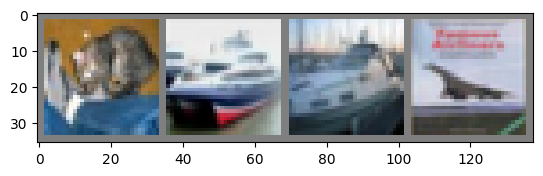

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
net = Net(killing_threshold= 0.1)
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  frog  ship  ship  plane


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 48 %


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 47.6 %
Accuracy for class: car   is 60.0 %
Accuracy for class: bird  is 26.5 %
Accuracy for class: cat   is 20.9 %
Accuracy for class: deer  is 45.2 %
Accuracy for class: dog   is 52.7 %
Accuracy for class: frog  is 63.9 %
Accuracy for class: horse is 48.5 %
Accuracy for class: ship  is 54.6 %
Accuracy for class: truck is 62.2 %
